In [1]:
import matplotlib.pyplot as plt
import numpy
import random
%matplotlib inline

In [2]:
def resample(array):
    n = len(array)
    return numpy.random.choice(array, n, replace = True)

def performBootstrap(array, iterations):
    collector = []
    for i in range(iterations):
        newResample = resample(array)
        mean = numpy.mean(newResample)
        collector.append(mean)
    return collector

def injectOutlier(array, mean, standardDeviation, severity, high = None, injectPosition = None):
    newArray = array.copy()
    if injectPosition is None:
        injectPosition = random.randint(0,len(newArray))
    outlierDelta = standardDeviation * severity
    if high is None:
        high = random.randint(0,2)
    if high:
        outlier = mean + outlierDelta
    else:
        outlier = mean - outlierDelta
    newArray[injectPosition] = outlier
    print("Injected an outlier value of %s at index %s" %(outlier, injectPosition))
    return newArray

In [3]:
mean = 0
standardDeviation = 0.1
n = 1000
distribution = numpy.random.normal(mean, standardDeviation, n)

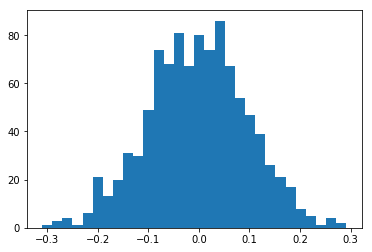

In [4]:
count, bins, ignored = plt.hist(distribution, 30)

(array([   6.,    9.,   11.,   39.,   46.,  108.,  178.,  264.,  380.,
         521.,  654.,  765.,  891.,  956.,  995.,  907.,  786.,  712.,
         534.,  465.,  324.,  188.,  113.,   65.,   41.,   25.,    9.,
           2.,    4.,    2.]),
 array([-0.01327219, -0.01252014, -0.01176808, -0.01101603, -0.01026398,
        -0.00951192, -0.00875987, -0.00800781, -0.00725576, -0.0065037 ,
        -0.00575165, -0.00499959, -0.00424754, -0.00349548, -0.00274343,
        -0.00199137, -0.00123932, -0.00048727,  0.00026479,  0.00101684,
         0.0017689 ,  0.00252095,  0.00327301,  0.00402506,  0.00477712,
         0.00552917,  0.00628123,  0.00703328,  0.00778534,  0.00853739,
         0.00928944]),
 <a list of 30 Patch objects>)

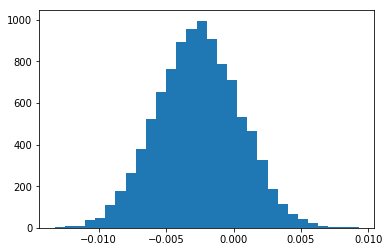

In [5]:
bootstrap = performBootstrap(distribution, 10000)
plt.hist(bootstrap, 30)

Injected an outlier value of -10.0 at index 695


(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   11.,  103.,  327.,  378.,  159.,   21.]),
 array([-10.        ,  -9.89708236,  -9.79416473,  -9.69124709,
         -9.58832945,  -9.48541181,  -9.38249418,  -9.27957654,
         -9.1766589 ,  -9.07374127,  -8.97082363,  -8.86790599,
         -8.764988

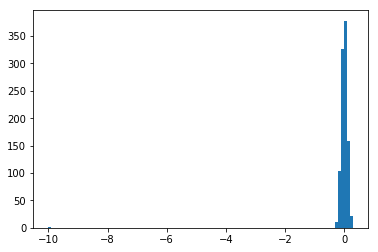

In [6]:
distributionWithOutlier = injectOutlier(distribution, mean, standardDeviation, 100)
plt.hist(distributionWithOutlier, 100)

(array([   1.,    0.,    2.,    0.,    0.,    1.,    0.,    0.,    0.,
           2.,    5.,    0.,    0.,    0.,    0.,    2.,    4.,    0.,
           2.,    2.,    1.,    3.,    4.,    8.,    1.,    6.,    7.,
           7.,   16.,   12.,   16.,   16.,   20.,   16.,    7.,   17.,
          16.,   16.,   28.,   20.,   39.,   46.,   49.,   63.,   60.,
          51.,   62.,   42.,   39.,   40.,   58.,   80.,   90.,  100.,
         132.,  163.,  159.,  170.,  188.,  163.,  139.,  134.,  145.,
         119.,  123.,  184.,  210.,  248.,  316.,  338.,  371.,  373.,
         335.,  320.,  274.,  247.,  229.,  198.,  187.,  263.,  257.,
         301.,  337.,  376.,  370.,  336.,  294.,  244.,  174.,  158.,
         128.,   91.,   56.,   30.,   22.,   12.,    6.,    1.,    0.,    2.]),
 array([-0.06597901, -0.06522794, -0.06447688, -0.06372582, -0.06297475,
        -0.06222369, -0.06147262, -0.06072156, -0.0599705 , -0.05921943,
        -0.05846837, -0.05771731, -0.05696624, -0.05621518, -0.0

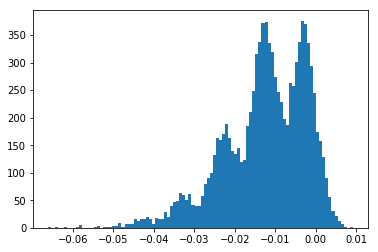

In [7]:
bootstrapWithOutlier = performBootstrap(distributionWithOutlier, 10000)
plt.hist(bootstrapWithOutlier, 100)